# Multivariate Exploratory Data Analysis

## Lesson Overview
Welcome to lesson three! Today, we will dive into creating, describing, and visualizing multivariate data relationships by using the Matplotlib, Pandas, and Seaborn libraries in Python.

By the end of this lesson you will be able to:
* Calculate the correlation coefficient 
* Construct a contingency table
* Practice importing dataframes
* Build plots to describe multiple variables within a single dataset

## Importing a dataframe from a csv file

We can import a csv file to work with external data. In order to do so, we are going to use pd.read_csv("nameOfFile.csv).

**Note** : your file must be stored in the same folder as this jupyter notebook.

In [11]:
penguins = pd.read_csv("penguins_wrangled.csv")

Now, we can look at the first few rows by typing dataframe.head(), or the last few rows by typing dataframe.tail()

In [12]:
penguins.head()

,Unnamed: 0,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
4,5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN


## Multivariate Non-Graphical

### Correlation Coefficient 

To calculate correlation we will make use of the corr() function. Again, we will follow the format dataframe.corr()

**Meanings**:
* 1: Full correlation. If one variable increases, so does the other
* 0: No correlation.
* -1: Full negative correlation. If one variable increases, the other decreases.

In [13]:
# Let's see the correlation for penguins' variables

penguins_corr = penguins.corr()
print(penguins_corr)

                     Unnamed: 0  Sample Number  Culmen Length (mm)  \
Unnamed: 0             1.000000       0.137114            0.703662   
Sample Number          0.137114       1.000000           -0.264023   
Culmen Length (mm)     0.703662      -0.264023            1.000000   
Culmen Depth (mm)     -0.691711      -0.009061           -0.228626   
Flipper Length (mm)    0.831031       0.019753            0.653096   
Body Mass (g)          0.692066      -0.025134            0.589451   
Delta 15 N (o/oo)     -0.371663       0.013260           -0.056942   
Delta 13 C (o/oo)     -0.254498      -0.486510            0.196765   

                     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
Unnamed: 0                   -0.691711             0.831031       0.692066   
Sample Number                -0.009061             0.019753      -0.025134   
Culmen Length (mm)           -0.228626             0.653096       0.589451   
Culmen Depth (mm)             1.000000            -0.5777

This table is quite confusing to look at, since it is showing us the correlation coefficient between **ALL** variables. So, if we want to look at two specific variables, we can use the same correlation table and indicate our variables by typing: correlationTable.loc["columnName", "columnName"]

In [14]:
# Let's check the correlation between Culmen Length and Culmen Depth
culmen_corr = penguins_corr.loc["Culmen Length (mm)", "Culmen Depth (mm)"]
print(culmen_corr)

-0.22862563591303017


### Contingency Table

In [28]:
# To create a contingency table we can type pd.crosstab(dataframe["columnName1"], dataframe["columnName2"])

freq_three = pd.crosstab(penguins["Species"], penguins["Island"], margins = True).to_markdown()
print(freq_three)

| Species                                   |   Biscoe |   Dream |   Torgersen |   All |
|:------------------------------------------|---------:|--------:|------------:|------:|
| Adelie Penguin (Pygoscelis adeliae)       |       44 |      55 |          47 |   146 |
| Chinstrap penguin (Pygoscelis antarctica) |        0 |      68 |           0 |    68 |
| Gentoo penguin (Pygoscelis papua)         |      119 |       0 |           0 |   119 |
| All                                       |      163 |     123 |          47 |   333 |


In [31]:
# If we want to see a table of proportions, we have to type "normalize = True" as a parameter

prop_one = pd.crosstab(penguins["Species"], penguins["Island"], margins = True, normalize = True).to_markdown()
print(prop_one)

| Species                                   |   Biscoe |    Dream |   Torgersen |      All |
|:------------------------------------------|---------:|---------:|------------:|---------:|
| Adelie Penguin (Pygoscelis adeliae)       | 0.132132 | 0.165165 |    0.141141 | 0.438438 |
| Chinstrap penguin (Pygoscelis antarctica) | 0        | 0.204204 |    0        | 0.204204 |
| Gentoo penguin (Pygoscelis papua)         | 0.357357 | 0        |    0        | 0.357357 |
| All                                       | 0.489489 | 0.369369 |    0.141141 | 1        |


## Multivariate Data Visualization

Now that we understand how Python can help us numerically analyze our multivariate data, let's see what Python's plotting tools can do to help visualize our data! Using the Matplotlib and Seaborn libraries for plot making, and the pandas library for importing data, we will learn how to create scatter plots, bar plots, linear model plots, and box plots to describe the relationships between variables in our dataset. 
  
We will practice loading libraries at the beginning of every new plot, but as a reminder, libraries only need to be imported once per Jupyter notebook. This repetition is meant to help you build the healthy habit of remembering to load your libraries at the beginning of your work. Additionally, one chunk produces only one plot. So all of the work you do in a chunk will only affect a single graph. Now, let's begin!

### Bar plot
Bar plots are another helpful data visualization that statisticians use to compare the values of various groups. Bar plots can be both vertical and horizontal, and they offer a relationship between a categorical and a continuous variable. Let's practice making them both ways!

Let's go back to the penguins dataset! For categorical plots, we will be using a subdataframe that we have already created for you. why?

In [13]:
# Add libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import sub-Dataframe and look at it
species_counts = pd.read_csv("penguins_counts.csv")

species_counts.head()

,Unnamed: 0,Species,Count
0,0,Adelie Penguin (Pygoscelis adeliae),152
1,1,Chinstrap penguin (Pygoscelis antarctica),68
2,2,Gentoo penguin (Pygoscelis papua),124


**Parameters**: 
* data = dataframe
* x = Show each categorical level that this variable has
* y = Numerical values for the y axis (Generally counts, but we can also display the mean for all values in one column)

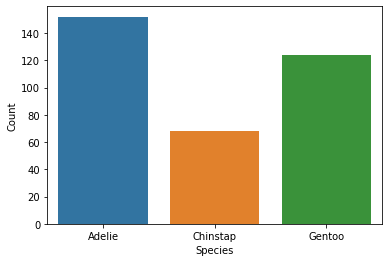

In [9]:
sns.barplot(data = species_counts, x = "Species", y ="Count")
plt.xticks([0,1,2],["Adelie", "Chinstap", "Gentoo"])
plt.show()

Similarly, we can also do a countplot if we are not able to access a subset of the dataframe.
Countplot will count how many times each level from the categorical variable (the x parameter) is repeated.

**Parameters**: 
* data = dataframe
* x = Count of each response to this categorical variable

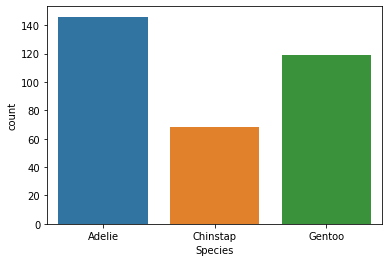

In [8]:
sns.countplot(data = penguins, x = "Species")
plt.xticks([0,1,2],["Adelie", "Chinstrap", "Gentoo"])
plt.show()

Now, what if we want to see how the counts change by also adding island? We can do so by introducing a new parameter: hue. Hue will make a distinction (by colors) for each level of the categorical variable we're adding.

**Parameters**: 
* data = dataframe
* x = Count of each response to this categorical variable
* hue = assigns a unique color to each response for this Categorical Variable


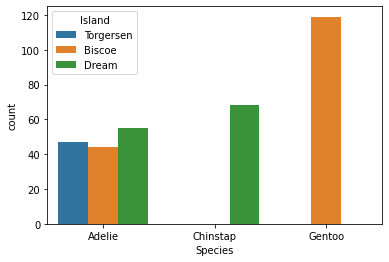

In [11]:
sns.countplot(data = penguins, x = "Species", hue = "Island")
plt.xticks([0,1,2],["Adelie", "Chinstrap", "Gentoo"])
plt.show()

In [ ]:
What if we also want to see how the data changes by sex? 

We will use the function catplot, which shows the relationship between a numerical and one or more categorical variables using one of several visual representations. 

**Parameters**: 
* data = dataframe
* x = Count of each response to this categorical variable
* hue = assigns a unique color to each category from this variable
* col = Create as many graphs as categories from this variable
* kind = kind of visualization we're using, for now we will only use count

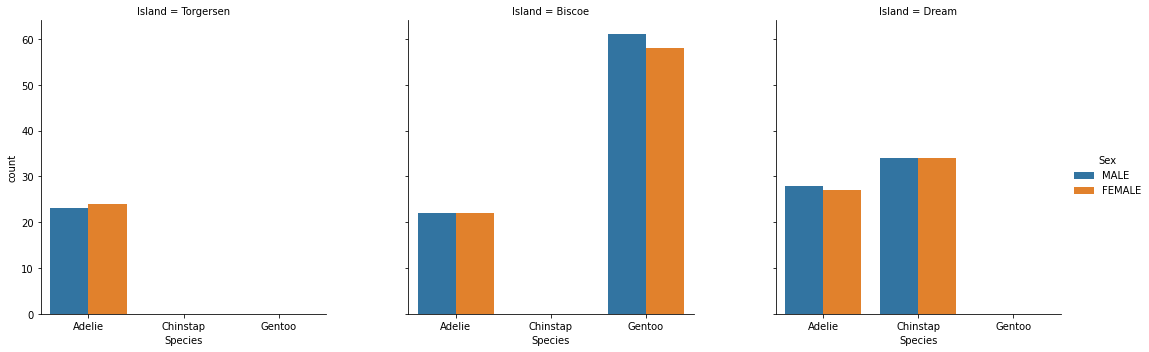

In [19]:
sns.catplot(data = penguins, x = "Species", hue = "Sex", col = "Island", kind = "count")
plt.xticks([0,1,2],["Adelie", "Chinstap", "Gentoo"])
plt.show()

### Histogram plot

Histograms are a common way to visualize the distribution of a single numeric variable. Furthermore, it shows the probability distribution of a continuous variable, so we will certainly need to use these in our statistical analysis. Let's see how to make histograms using the hist( ) method.

Here we will need to specify the data, bins, and density.

* bins = "auto" will choose the best bin edges
* density = True will set the area within the histogram to 1.0

In [ ]:
penguins.head()

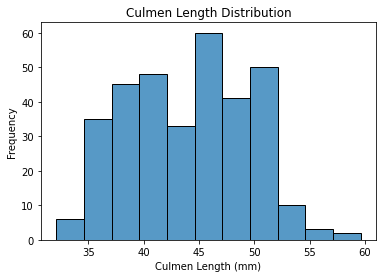

In [21]:
# Add libraries
import matplotlib.pyplot as plt

# Plot the histogram
sns.histplot(penguins["Culmen Length (mm)"], bins = "auto")

# Label axis
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Frequency")

# Add title
plt.title("Culmen Length Distribution")

# Display the graph
plt.show()

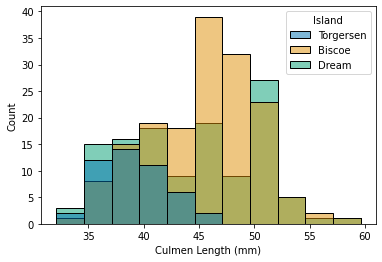

In [22]:
# Add libraries
import matplotlib.pyplot as plt

# Plot the histogram
sns.histplot(data = penguins, x = "Culmen Length (mm)", hue = "Island", palette = "colorblind")
plt.show()

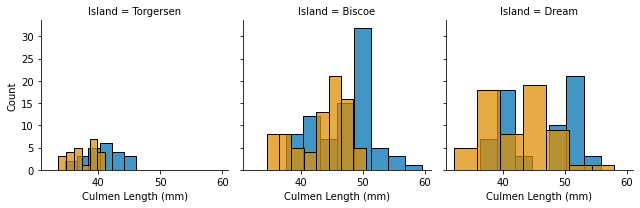

In [23]:
# The format we will use is sns.kdeplot(dataframe["columnName"])
g = sns.FacetGrid(data = penguins, col = "Island", hue = "Sex", palette = "colorblind")
g.map(sns.histplot, "Culmen Length (mm)")

# Display the plot
plt.show()

### Density plot

In [ ]:
penguins.head()

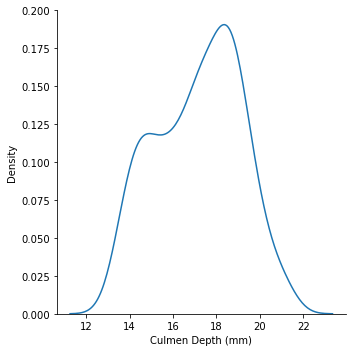

In [25]:
# The format we will use is sns.kdeplot(dataframe["columnName"])
sns.displot(penguins, x = "Culmen Depth (mm)", kind="kde")

# Display the plot
plt.show()

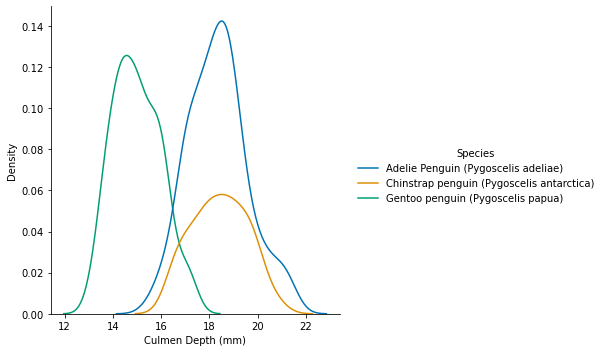

In [26]:
# The format we will use is sns.kdeplot(dataframe["columnName"])
sns.displot(penguins, x = "Culmen Depth (mm)", hue = "Species", kind="kde", palette = "colorblind")

# Display the plot
plt.show()

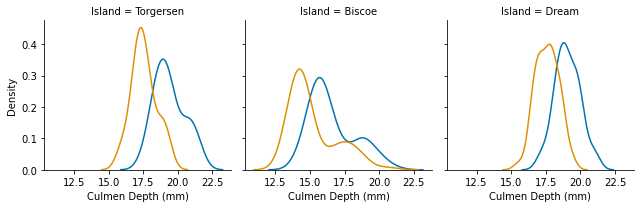

In [24]:
# The format we will use is sns.kdeplot(dataframe["columnName"])
g = sns.FacetGrid(penguins, col = "Island", hue = "Sex", palette = "colorblind")
g.map(sns.kdeplot, "Culmen Depth (mm)", warn_singular=False)

# Display the plot
plt.show()

### Scatter plot

Scatter plots are a helpful way to visualize the relationship between two variables in statistics. Using the Matplotlib library, we can create scatter plots for the same Penguins dataset that we have been working with thus far.

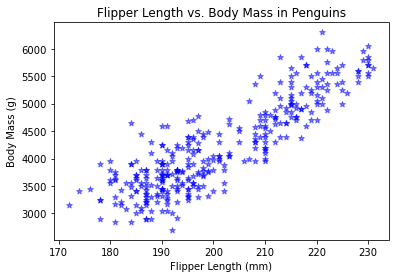

In [15]:
# As always, load libraries
import matplotlib.pyplot as plt
import pandas as pd

# Create the data
penguins = pd.read_csv("penguins_wrangled.csv")

# Draw the scatter plot
plt.scatter(penguins["Flipper Length (mm)"], penguins["Body Mass (g)"], c = "blue", marker = "*", alpha = 0.5)

# Add x-axis and y-axix labels
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

# Add a title
plt.title("Flipper Length vs. Body Mass in Penguins")

# Display the graph
plt.show()

### lm plots
The lm plot displays the scattered data and fits a regression model onto it. It is exactly the same as putting the line of best fit onto our graph, and this process helps to understand the relationship between two variables. The method lmplot( ) takes the input of two column names (x and y) as a string and a DataFrame variable, and by default, fits the regression line. Let's try it out!

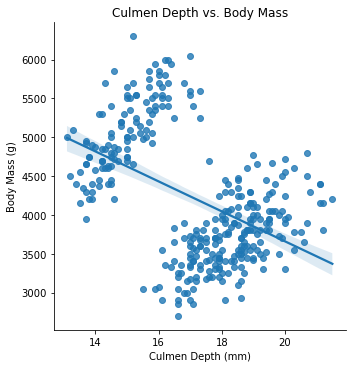

In [16]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
penguins = pd.read_csv("penguins_wrangled.csv")

# Create the plot
sns.lmplot(data = penguins, x = "Culmen Depth (mm)", y = "Body Mass (g)")

# Add a title
plt.title("Culmen Depth vs. Body Mass")

# Display the plot
plt.show()

If we wanted to remove the regression line, we can set the parameter fig_reg to False within the lmplot( ) method. By default, Seaborn includes the line of best fit.

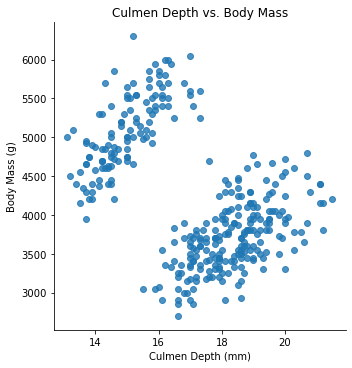

In [17]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
penguins = pd.read_csv("penguins_wrangled.csv")

# Create the plot
sns.lmplot(data = penguins, x = "Culmen Depth (mm)", y = "Body Mass (g)", fit_reg = False)

# Add a title
plt.title("Culmen Depth vs. Body Mass")

# Display the plot
plt.show()

Huh, doesn't the above scatterplot look interesting? There are two clusters of data, which might hint that something else is going on in our data. One would assume that there would be a strong, positive association between body mass and culmen depth in penguins, but here we see the opposite. This could be a result of the differences in penguin species, so let's go ahead and add it as another dimension to our plot!

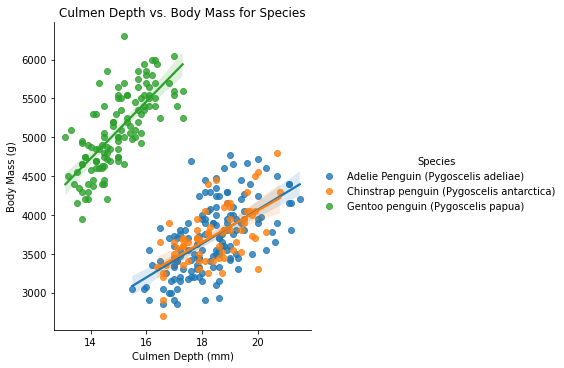

In [18]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
penguins = pd.read_csv("penguins_wrangled.csv")

# Create the plot
sns.lmplot(x = "Culmen Depth (mm)", y = "Body Mass (g)", hue = "Species", data = penguins)

# Add a title
plt.title("Culmen Depth vs. Body Mass for Species")

# Display the plot
plt.show()

### Box plot
Box plots, or box-and-whisker plots, are another helpful visualization to understand the distribution of our data. Let's practice making a box plot in Seaborn using the same dataset from our previous example!

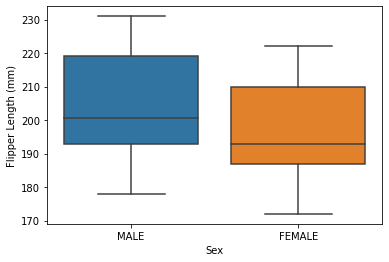

In [19]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
# We also do not need to create our dataframe more than once in a Jupyter notebook. 
# For the sake of practice, we'll do it again!
penguins = pd.read_csv("penguins_wrangled.csv")

# Create a box plot for the variables 'Body Mass (g)' and 'Sex'
sns.boxplot(data = penguins, x = "Sex", y = "Flipper Length (mm)")

# Display the plot
plt.show()

What if we wanted to learn more about how flipper length varies by sex AND by species? We can add the 'Species' variable to our box plot by adding color, using the hue parameter within sns.boxplot( ). Let's try it out!

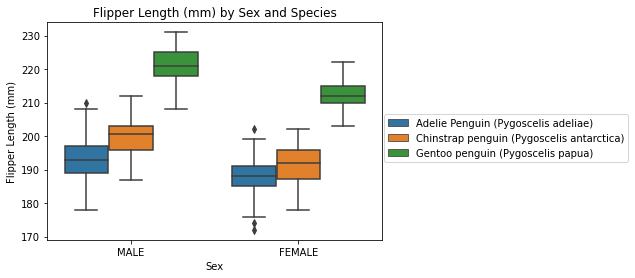

In [20]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
penguins = pd.read_csv("penguins_wrangled.csv")

# Create a box plot for the variables 'Body Mass (g)' and 'Sex'
sns.boxplot(data = penguins, x = "Sex", y = "Flipper Length (mm)", hue = "Species")

# Edits legend so that it does not block the box drawings
plt.legend(bbox_to_anchor = (1.75, 0.6))

# Add a title
plt.title("Flipper Length (mm) by Sex and Species")

# Display the plot
plt.show()

### Segmented Bar Charts

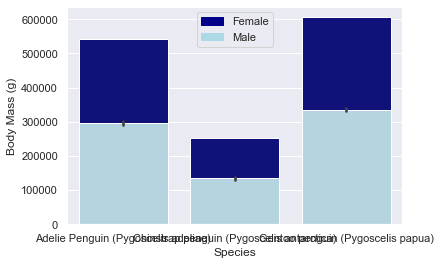

In [43]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# top bar -> sum all values(male=No and male=Yes) to find y position of the bars
total = penguins.groupby('Species')['Body Mass (g)'].sum().reset_index()

# bar chart 1 -> top bars (group of 'male=No')
bar1 = sns.barplot(x = "Species",  y = "Body Mass (g)", data = total, color ='darkblue')

# bottom bar ->  take only male=Yes values from the data
male = penguins[penguins.Sex=='MALE']

# bar chart 2 -> bottom bars (group of 'male=Yes')
bar2 = sns.barplot(x = "Species", y = "Body Mass (g)", data = male, estimator = sum, color='lightblue')

# Add legend
top_bar = mpatches.Patch(color='darkblue', label='Female')
bottom_bar = mpatches.Patch(color='lightblue', label='Male')
plt.legend(handles=[top_bar, bottom_bar])

# Display the graph
plt.show()